In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
im1=cv2.imread("./photos/tab1.png") #./tab1.png
im2=cv2.imread("./photos/tab1h7.png") #./tab1h7.png

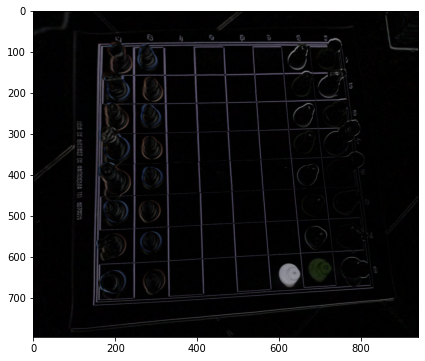

In [ ]:
#resta de imagenes con todos los canales
sub=cv2.absdiff(im1,im2)
plt.figure(figsize=(10,6))
plt.imshow(sub)
plt.show()

se puede ver que es difícil distinguir entre la pieza movida, demás piezas y cuadrícula, por lo que se procede a utilizar un metodo para detectar la pieza movida únicamente.

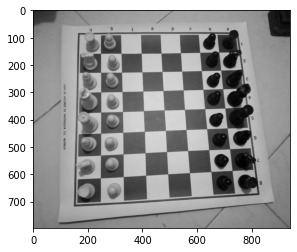

In [ ]:
#imagen1 en escala de grises
im1gray=cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
plt.imshow(im1gray,cmap="gray")

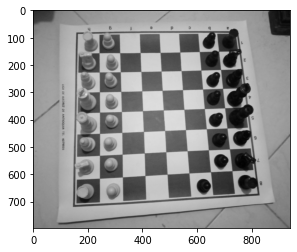

In [ ]:
# imagen 2 en escala de grises (movimiento de peón negro de casilla verde a blanca)
im2gray=cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
plt.imshow(im2gray,cmap="gray")

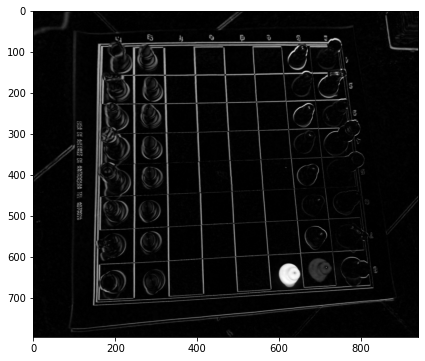

In [ ]:
#resta de imágenes en escala de grises
subgray=cv2.absdiff(im1gray,im2gray)
plt.figure(figsize=(10,6))
plt.imshow(subgray,cmap="gray")
plt.show()

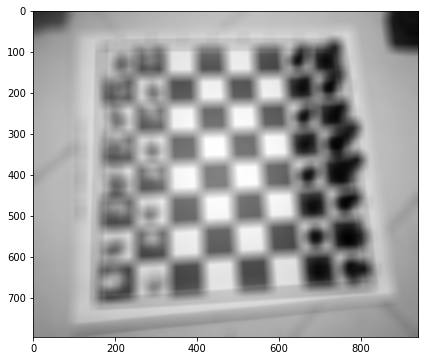

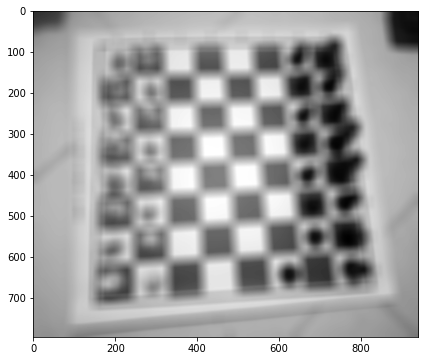

In [ ]:
#suavizado de ambos fotogramas con filtro pasabajas
# se utiliza debido a que como hubo movimiento a la hora de tomar las fotos,
# era dificil distinguir las piezas de la cuadrícula.
kernel=(32,32)
f1=cv2.blur(im1gray,kernel)
f2=cv2.blur(im2gray,kernel)
plt.figure(figsize=(10,6))
plt.imshow(f1,cmap="gray")
plt.show()
plt.figure(figsize=(10,6))
plt.imshow(f2,cmap="gray")
plt.show()

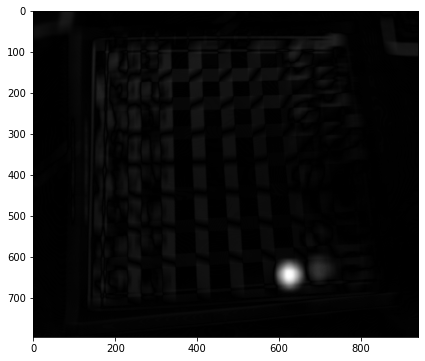

In [ ]:
#resta de los fotogramas suavizados
subf=cv2.absdiff(f1,f2)
plt.figure(figsize=(10,6))
plt.imshow(subf,cmap="gray")
plt.show()

Se puede ver que ahora es mucho más facil aplicar un umbral de decisión donde se puedan visualizar las regiones de movimiento de la pieza en cuestión.

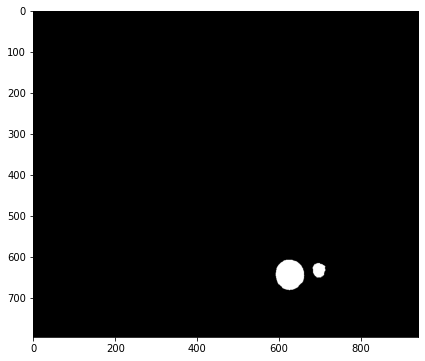

In [ ]:
out=cv2.threshold(src=subf, thresh=22, maxval=255, type=cv2.THRESH_BINARY)[1]
plt.figure(figsize=(10,6))
plt.imshow(out,cmap="gray")
plt.show()